In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns 

# Pregunta 1
### ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes con GRD9 que llegarán el día 425 al Hospital Salvador utilizando un método de media móvil sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  



In [104]:
Info_sheet = pd.read_excel('Datos.xls', sheet_name='Información Histórica') #Datos del dia de llegada
Info_sheet

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1,4,3
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1,5,4
2,3,Hospital Dr. Luis Tisné B.,GRD7,1,5,4
3,4,Hospital Dr. Exequiel González Cortés,GRD10,1,11,10
4,5,Hospital Barros Luco Trudeau,GRD6,1,6,5
...,...,...,...,...,...,...
65529,65530,Hospital Clínico San Borja-Arriarán,GRD2,424,428,4
65530,65531,Hospital Dr. Exequiel González Cortés,GRD9,424,429,5
65531,65532,Hospital Del Salvador,GRD10,424,434,10
65532,65533,Hospital de Enfermedades Infecciosas Dr. Lucio...,GRD3,424,427,3


In [24]:
GRD9=Info_sheet.loc[(Info_sheet["GRD"]=="GRD9") & (Info_sheet["Hospital al que llega"] == "Hospital Del Salvador")]
Llegadas_GRD9 = GRD9[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()
Llegadas_GRD9.loc[422] = 0
Llegadas_GRD9.loc[423] = 0
Llegadas_GRD9.loc[424] = 0
Llegadas_GRD9.tail(5)

,Número de llegada
Día de llegada,
420,3
421,2
422,0
423,0
424,0


In [26]:
media_movil = Llegadas_GRD9.tail(5)
np.round(media_movil.mean()[0],0)

1.0

# Pregunta 2
### ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425 al Hospital Salvador utilizando un método de media móvil sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  



In [17]:
PR2=Info_sheet.loc[(Info_sheet["Hospital al que llega"] == "Hospital Del Salvador")]
Llegadas_GHDS = GRD9[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()
Llegadas_GHDS.tail(5)

,Número de llegada
Día de llegada,
420,14
421,12
422,18
423,9
424,6


In [18]:
media_movil = Llegadas_GHDS.tail(5)
np.round(media_movil.mean()[0],0)

12.0

# Pregunta 3 
### ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425 a la red utilizando un método de media móvil sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?   



In [19]:
Llegadas_Totales = Info_sheet[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()
Llegadas_Totales.tail(5)

,Número de llegada
Día de llegada,
420,183
421,159
422,160
423,159
424,82


In [20]:
media_movil = Llegadas_Totales.tail(5)
np.round(media_movil.mean()[0],0)

149.0

# Pregunta 4
### ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes con GRD9 que llegarán el día 425 al Hospital Salvador utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  



In [32]:
from sklearn.linear_model import LinearRegression

In [37]:
GRD9=Info_sheet.loc[(Info_sheet["GRD"]=="GRD9") & (Info_sheet["Hospital al que llega"] == "Hospital Del Salvador")]
Llegadas_GRD9 = GRD9[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()
Llegadas_GRD9.loc[422] = 0
Llegadas_GRD9.loc[423] = 0
Llegadas_GRD9.loc[424] = 0
Llegadas_GRD9.tail(5)
Llegadas_GRD9 = Llegadas_GRD9.tail(5).reset_index()
Llegadas_GRD9

,Día de llegada,Número de llegada
0,420,3
1,421,2
2,422,0
3,423,0
4,424,0


In [38]:
X = Llegadas_GRD9[["Día de llegada"]]
y = Llegadas_GRD9[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

Pendiente: -0.7999999999999999, Intercepto: 338.59999999999997


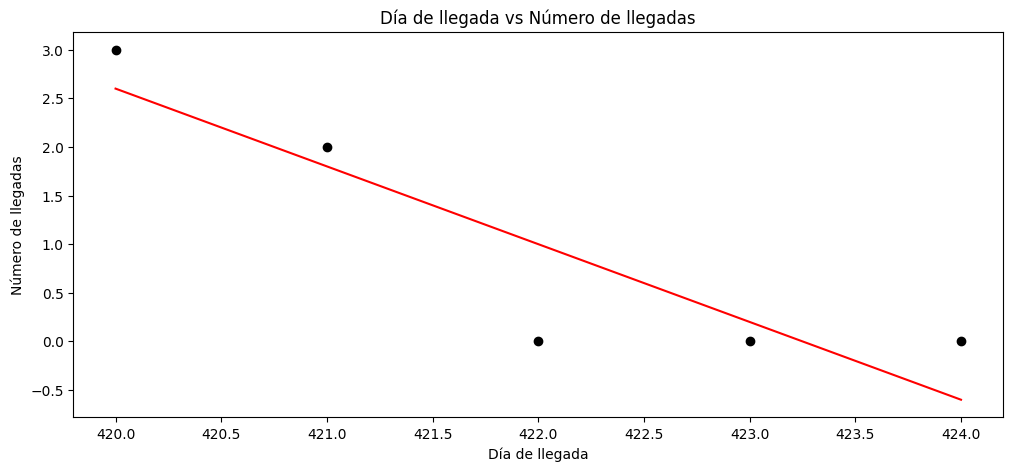

In [39]:
plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

In [40]:
print(regressor.score(X, y))

0.7999999999999943


In [43]:
prox_llegada = 425*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 425: {np.round(prox_llegada,0)}")

Llegadas estimadas para el día 425: -1.0


### Como no pueden haber llegadas negaticas se concluye que se pronostica 0 llegadas con regresion lineal simple

# Pregunta 5 
### ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán el día 425 al Hospital Salvador utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  



In [52]:
PR5=Info_sheet.loc[(Info_sheet["Hospital al que llega"] == "Hospital Del Salvador")]
Llegadas_GHDS = PR5[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()
Llegadas_GHDS = Llegadas_GHDS.tail(5).reset_index()
Llegadas_GHDS

,Día de llegada,Número de llegada
0,420,14
1,421,12
2,422,18
3,423,9
4,424,6


In [53]:
X = Llegadas_GHDS[["Día de llegada"]]
y = Llegadas_GHDS[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

Pendiente: -1.9000000000000001, Intercepto: 813.6


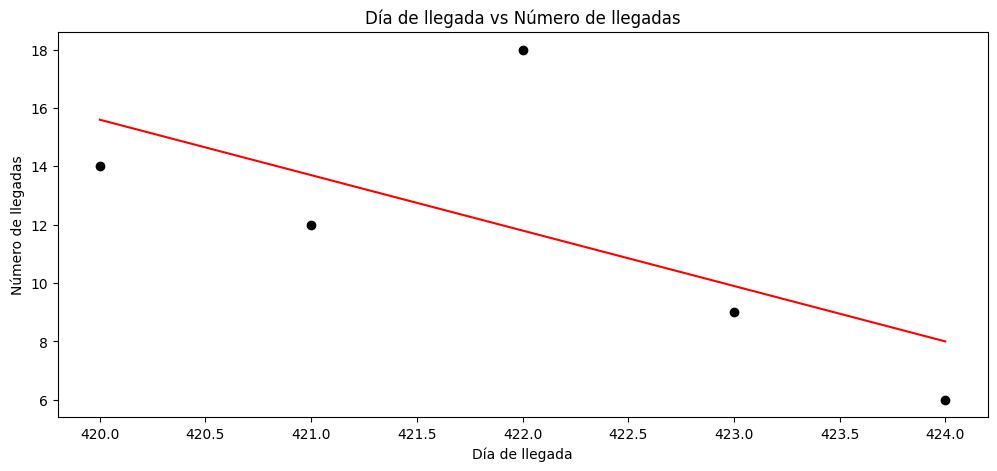

In [54]:
plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

In [61]:
prox_llegada = 425*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 425: {np.round(prox_llegada,0)}")

Llegadas estimadas para el día 425: 6.0


# Pregunta 6 
### ¿Cuál de las siguientes alternativas corresponde a la estimación de la cantidad de pacientes que llegarán a la red el día 425 utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  



In [64]:
Llegadas_Totales = Info_sheet[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()
Llegadas_Totales = Llegadas_Totales.tail(5).reset_index()
Llegadas_Totales

,Día de llegada,Número de llegada
0,420,183
1,421,159
2,422,160
3,423,159
4,424,82


In [66]:
X = Llegadas_Totales[["Día de llegada"]]
y = Llegadas_Totales[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

Pendiente: -20.200000000000003, Intercepto: 8673.000000000002


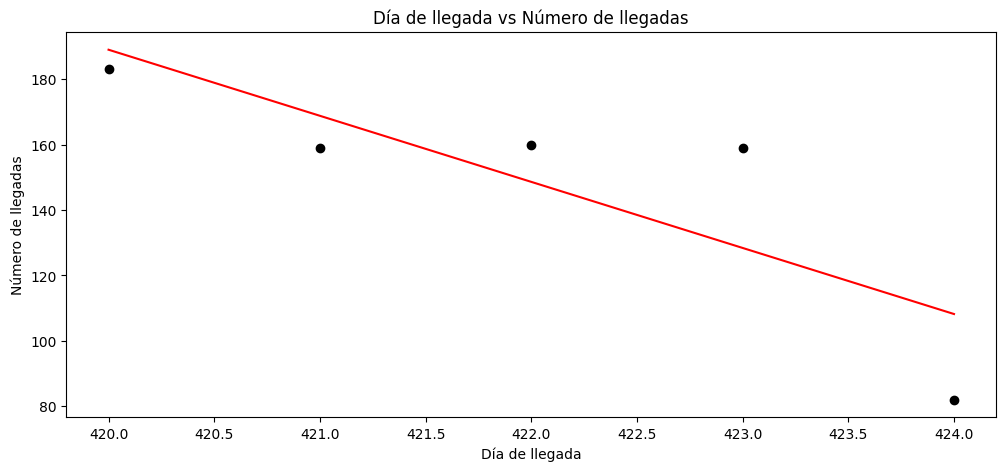

In [67]:
plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

In [91]:
prox_llegada = 424*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 425: {np.round(prox_llegada,0)}")


Llegadas estimadas para el día 425: 108.0


[20]
[20.]
0.7989292088042832
Coeficiente de determinación (R2): 0.7989292088042832


# Pregunta 7 
### ¿Cuál de las siguientes alternativas corresponde al valor del coeficiente R2 de una estimación de la cantidad de pacientes que llegarán a la red el día 425 utilizando una regresión lineal simple sobre los últimos 5 días (días 420 a 424) redondeado al entero superior?  



In [94]:

# Calcular el coeficiente de determinación (R2)
r2 = r2_score([82,0], [108,0])
print(r2)
print("Coeficiente de determinación (R2):", r2)


0.7989292088042832
Coeficiente de determinación (R2): 0.7989292088042832


# Pregunta 8
### Usted realizó una estimación sobre el total de pacientes que llegarán a la red los días 420 a 424, siendo esta predicción: 156, 123, 178, 200 y 155, para los días 420 a 424 respectivamente. ¿Cuál de las siguientes alternativas corresponde al error total de esta estimación?  



In [99]:
Llegadas_Totales8 = Llegadas_Totales.tail(5)
Llegadas_Totales8 = Llegadas_Totales8.rename(columns={"Día de llegada": "Día", "Número de llegada": "Llegadas"})
Llegadas_Totales8["Regresión"] = [156, 123, 178, 200 ,155]
Llegadas_Totales8["Error"] = Llegadas_Totales8.apply(lambda row: row.Llegadas-row.Regresión, axis = 1)
Llegadas_Totales8

,Día,Llegadas,Regresión,Error
0,420,183,156,27
1,421,159,123,36
2,422,160,178,-18
3,423,159,200,-41
4,424,82,155,-73


In [101]:
Llegadas_Totales8["Error"].sum()

-69

# Pregunta 9
### Los valores del intercepto y la pendiente de un modelo de regresión lineal para predecir la cantidad de pacientes que llegarán un día cualquiera al Hospital San José son 60 y 10 respectivamente. La variable independiente de esta regresión corresponde a las llegadas del hace 7 días. ### 
¿Cuál de las siguientes alternativas corresponde a la estimación de esta regresión para los días 422, 423 y 424?

In [108]:
PR9=Info_sheet.loc[(Info_sheet["Hospital al que llega"] == "Complejo Hospitalario San José")]
Llegadas_GHDS = Info_sheet[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()
Llegadas_SJ = Llegadas_GHDS.tail(5).reset_index()
Llegadas_SJ

,Día de llegada,Número de llegada
0,420,183
1,421,159
2,422,160
3,423,159
4,424,82


In [112]:
prox_llegada8 = 82*10+60
print(f"Llegadas estimadas para el día 425: {np.round(prox_llegada8,0)}")


Llegadas estimadas para el día 425: 880
